# New York City Airbnb Price Estimates 2
## In this analysis, I included NYC subway and crime datasets in addition to the original price dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Import data
ori_df = pd.read_csv('AB_NYC_2019.csv')
df = ori_df.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Import subway map
df_sub = pd.read_csv('NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
df_sub.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [4]:
df_sub['Route1'].unique()

array(['R', 'N', 'F', 'B', 'Q', 'D', 'J', 'A', 'L', 'G', 'FS', 'M', 'C',
       'E', 'e', 'H', 'GS', '1', '2', '5', '3', '7', '4', 'B ', '6'],
      dtype=object)

In [5]:
# Import Crime rate map
df_cm = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')
df_cm.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


## GPS Coordinates
### Method 1: 
#### -- directly calculate the distance between two sets of GPS coordinates by using Haversine formula 
Pros: very accurate
Cons: 1) takes time, especially when the dataset is large; 2) this level of accuracy may not be necesary in a small area, such as NYC, compared to Earth

In [6]:
# Calculate the longitude and latitude
def lat_lon_to_distance(lat1, lon1, lat2, lon2):
    rlat1 = math.radians(lat1)
    rlat2 = math.radians(lat2)
    del_lat = math.radians(lat2 - lat1)
    del_lon = math.radians(lon2 - lon1)
    a = pow(math.sin(del_lat/2), 2) + math.cos(rlat1)*math.cos(rlat2)*pow(math.sin(del_lon/2), 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = 6371 * c #km, earth's radius
    return d

In [7]:
# Calculate the number of subway stations 5 min away from the airbnb units
import time
start_time = time.time() # to time this method
close = []
station_loc = np.unique(df_sub[['Station Latitude', 'Station Longitude']], axis = 0) #unique stations
five_min_walk = 1.4 * 60 * 5 / 1000 # distance an average human walks in 5 min
for ii in range(len(df)):
    score = 0
    lat1 = df['latitude'][ii]
    lon1 = df['longitude'][ii]
    for jj in range(len(station_loc)):
        lat2 = station_loc[jj][0]
        lon2 = station_loc[jj][1]
        distance = lat_lon_to_distance(lat1, lon1, lat2, lon2)
        if distance - five_min_walk <= 0:
            score+=1
    close.append(score)
df['subway station H'] = close  
print("--- %s seconds ---" % (time.time() - start_time))
k1 = time.time() - start_time

--- 160.50177574157715 seconds ---


### Method 2:
#### -- convert GPS coordinates to location coordinates in km and compare them to the set distance
In this method, I will first convert the location coordinates in degrees of latitude and longitude to coordinates in km. Longitudes are great circles, with the circumference of 2 x pi x R, where R is the radius of Earth. So every degree along
the same longitude covers the distance of 2 x pi x R/360 in km. Latitudes, other than the equator, are small circles. The circumference at each latitude level is 2 x pi x R x cos(latitude) in km. Thus each degree along the same latitude covers the distance of 2 x pi x R x cos(latitude)/360 in km. 

Each set of GPS coordinates includes latitude and longitude, which are degrees from the original point, where latitude and longitude are 0. Each physical location can also be expressed as new x and y coordinates based on latitude and longitude. 

x (unit: km) = latitude in degree x 2 x pi x R x cos(latitude)/360 degree 
y (unit: km) = longitude in degrees x 2 x pi x R/360 degree  

Next, I will look at how many subway stations there are near an Airbnb unit. Instead of calculating the distance between each unit (one instance of 48895) and a station (one instance of 472) and include the station if it is within a certain distance with double for loops, which is very slow, I will use boolean masking to only include a subway station if it is within a 5 min-walk away from the unit. This will allow me to use one for loop and list comprehension.

In [8]:
import time
start_time = time.time() # to time this method
close = []
station_loc = np.unique(df_sub[['Station Latitude', 'Station Longitude']], axis = 0)
five_min_walk = 1.4 * 60 * 5 / 1000 # distance an average human walks in 5 min
for ii in range(len(df)):
    score = 0
    lat1 = df['latitude'][ii] #in degree
    lon1 = df['longitude'][ii] #in degree
    x1 = abs(lat1 * 2 * np.pi * 6371 * np.cos(math.radians(lat1)) / 360) # Earth's radius is 6371 km
    y1 = abs(lon1 * 2 * np.pi * 6371 / 360)
    # find how many stations are within 5 minutes away
    close_stations = len(station_loc[[((abs(station_loc[jj][0] * 2 * np.pi * 6371 * np.cos(math.radians(station_loc[jj][0])) / 360)) <= (x1 + five_min_walk)) \
                                      & ((abs(station_loc[jj][0] * 2 * np.pi * 6371 * np.cos(math.radians(station_loc[jj][0])) / 360)) >= (x1 - five_min_walk)) \
                                      & ((abs(station_loc[jj][1] * 2 * np.pi * 6371 / 360)) <= (y1 + five_min_walk)) \
                                      & ((abs(station_loc[jj][1] * 2 * np.pi * 6371 / 360)) >= (y1 - five_min_walk)) \
                                      for jj in range(len(station_loc))]])
    close.append(close_stations)
df['subway station xy'] = close     
print("--- %s seconds ---" % (time.time() - start_time))
k2 = time.time() - start_time
from scipy.stats import pearsonr
p2 = pearsonr(df['subway station H'].tolist(), df['subway station xy'].tolist())
print('Pearson R: ', p2)

--- 476.1290512084961 seconds ---
Pearson R:  (0.7331998136718041, 0.0)


### Method 3:
#### -- converts the set distance to degree and directly compare with given latitude and longitude values
This method is the reverse version of method 2. Instead of converting latitude and longitude to km, I will convert the 5-min walk to degrees.
Inspiration: https://stackoverflow.com/questions/4000886/gps-coordinates-1km-square-around-a-point
The circumference of the great longitude circle is 2 x pi x R, and that of the small latitude circle is 2 x pi x R x cos(lat). Both in km. So the 5-min walk at the same latitude to the circumference of the small latitude circle is equal to the degree equivalent of the 5-min walk to 360 degree. Similarly, the 5-min walk at the same longitude to the circumference of the great longitude circle is equal to the degree equivalent of the 5-min walk to 360 degres.

Degree(lat) = 360 x D/(2 x pi x R x cos(lat))
Degree(lon) = 360 x D/(2 x pi x R)

In [9]:
import time
start_time = time.time() # to time this method
close = []
station_loc = np.unique(df_sub[['Station Latitude', 'Station Longitude']], axis = 0)
five_min_walk = 1.4 * 60 * 5 / 1000 # distance an average human walks in 5 min
for ii in range(len(df)):
    score = 0
    lat1 = df['latitude'][ii] #in degree
    lon1 = df['longitude'][ii] #in degree
    dg_walk_lat = 360 * five_min_walk / (2 * np.pi * 6371 * math.radians(lat1)) # distance converted to degree
    dg_walk_lon = 360 * five_min_walk / (2 * np.pi * 6371)
    # find how many stations are within 5 minutes away
    close_stations = len(station_loc[[(station_loc[jj][0] <= (lat1 + dg_walk_lat)) \
                                      & (station_loc[jj][0] >= (lat1 - dg_walk_lat)) \
                                      & (station_loc[jj][1] <= (lon1 + dg_walk_lat)) \
                                      & (station_loc[jj][1] >= (lon1 - dg_walk_lat)) \
                                      for jj in range(len(station_loc))]])
    close.append(close_stations)
df['subway station'] = close      # 0~51 stations, on average 27
print("--- %s seconds ---" % (time.time() - start_time))
k3 = time.time() - start_time
p3 = pearsonr(df['subway station H'].tolist(), df['subway station'].tolist())
print('Pearson R: ', p3)

--- 105.24572324752808 seconds ---
Pearson R:  (0.8683986493829478, 0.0)


In [10]:
# Compare three methods
GPS_xy = pd.DataFrame([{'Time (s)': k1, 'Pearson R': ''}, \
                       {'Time (s)': k2, 'Pearson R': p2[0]}, \
                       {'Time (s)': k3, 'Pearson R': p3[0]}], \
                       index = ['Method 1', 'Method 2', 'Method 3'])
GPS_xy

,Time (s),Pearson R
Method 1,160.502773,
Method 2,476.130037,0.7332
Method 3,105.245723,0.868399


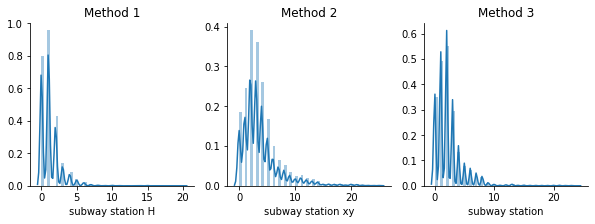

In [11]:
fig, ax = plt.subplots(1,3, figsize = (10, 3))
sns.distplot(df['subway station H'], ax = ax[0]).set_title('Method 1')
sns.distplot(df['subway station xy'], ax = ax[1]).set_title('Method 2')
sns.distplot(df['subway station'], ax = ax[2]).set_title('Method 3')
sns.despine()

Method 3 has comparably better accuracy than method 2 and takes the least computing time. Both methods 2 and 3 show higher numbers of subway stations than method 1.

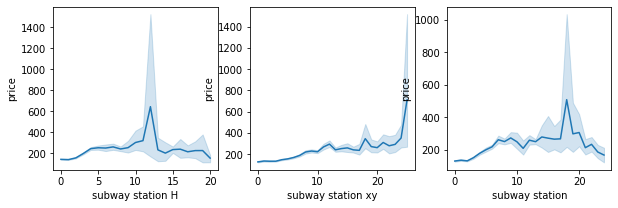

In [12]:
fig, ax = plt.subplots(1,3, figsize = (10, 3))
p1 = sns.relplot(x = 'subway station H', y = 'price', data = df, kind = 'line', ax = ax[0])
p2 = sns.relplot(x = 'subway station xy', y = 'price', data = df, kind = 'line', ax = ax[1])
p3 = sns.relplot(x = 'subway station', y = 'price', data = df, kind = 'line', ax = ax[2])
p1.despine()
plt.close(p1.fig); plt.close(p2.fig); plt.close(p3.fig)

In [13]:
# Which Airbnb has the most subway stations nearby?
df.iloc[df['subway station'].idxmax()]    

id                                                          9475907
name                              Spacious alcove studio in Tribeca
host_id                                                     1991700
host_name                                                     Rajat
neighbourhood_group                                       Manhattan
neighbourhood                                    Financial District
latitude                                                    40.7112
longitude                                                  -74.0083
room_type                                           Entire home/apt
price                                                           150
minimum_nights                                                    3
number_of_reviews                                                 0
last_review                                                     NaN
reviews_per_month                                               NaN
calculated_host_listings_count                  

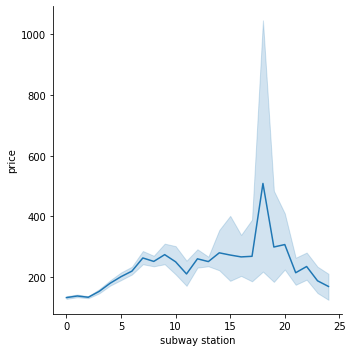

In [14]:
# Let's look at the relationship between the number of subway stations and the price
sns.relplot(x = 'subway station', y = 'price', data = df, kind = 'line')

Clearly, the number of subway stations and the Airbnb price is linearly correlated when there are less than ~7 subway stations nearby. This can be due to 1) the large variability of prices for units near more than 7 subway stations and 2) the lack of data for units near more than 7 subway stations.

Now let's map the crime rate onto our price.
The crime dataset includes all crimes from 01/01/2006 to 12/31/2018. Considering the timliness of this analysis, I will only include the most relevant information for the price. 

In the price dataset, the "last_review" column includes the dates when each review was posted. I will look at their distributions first. 

In [15]:
# Drop rows with missing "last review"
df = df.dropna(subset = ['last_review']).reset_index().drop(['index'], axis = 1)
# Convert the dates of the last review to numerical values
import datetime
from datetime import datetime, date, timedelta
today = date.today()
today = datetime.strptime(str(today), '%Y-%m-%d')
k = []
for x in range(len(df)):
    k.append(datetime.strptime(df['last_review'][x], '%Y-%m-%d'))
df['last_review'] = k
df['Days since last review'] = today - df['last_review']
df['Days since last review']

0       483 days
1       269 days
2       224 days
3       452 days
4       237 days
          ...   
38838   222 days
38839   222 days
38840   222 days
38841   222 days
38842   221 days
Name: Days since last review, Length: 38843, dtype: timedelta64[ns]

In [16]:
# Only keep the numerical values for the days since the last review
k = []
j = []
for x in range(len(df)):
    if len(str(df['Days since last review'][x])) == 18: # earliest last review was in 2011, made the days four digits
        k.append(int(str(df['Days since last review'][x])[:4]))
    elif len(str(df['Days since last review'][x])) == 17: 
        k.append(int(str(df['Days since last review'][x])[:3]))
df['Days since last review'] = k

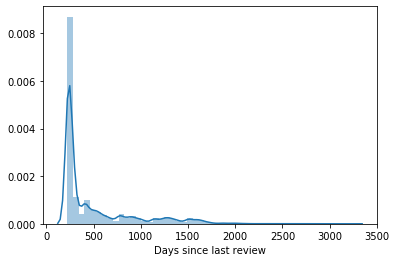

In [17]:
sns.distplot(df['Days since last review'])

The distribution suggests that some "last_reviews" go way back. In this analysis, I do not focus on how the price prediction model evolves overtime. To eliminate the impact of early reviews on the model, I will only focus on the majority of the reviews.

2017-12-20
2019-07-08


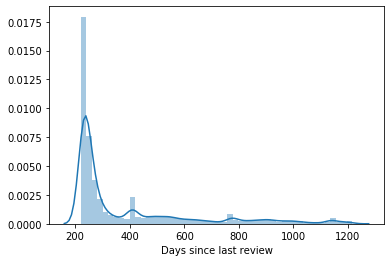

In [18]:
# Look at the reviews that are within 90% percentile
df = df[df['Days since last review'] < np.percentile(df['Days since last review'], 90)].reset_index().drop(['index'], axis = 1)
sns.distplot(df['Days since last review'])
ea_date = date.today()-timedelta(days = np.percentile(df['Days since last review'], 90))
print(ea_date)
late_date = date.today()-timedelta(days = np.min(df['Days since last review']))
print(late_date)

I will only consider three months of crimes before the earliest date, considering the timely impact of the crimes. So starting at 9/20/2017.Since the crime dataset only has data until 12/31/2018, I will only consider the price dataset until 3/30/2019
I will asssume that the subway stations do not change.

In [19]:
df2 = df.copy()
df2 = df2[[datetime.strptime(str(datetime.date(df2['last_review'][x])), '%Y-%m-%d') < datetime.strptime('4/1/2019', '%m/%d/%Y') for x in range(len(df2))]]
df2 = df2.reset_index().drop(['index'], axis = 1)

In [20]:
df_cm2 = df_cm.copy()
df_cm2 = df_cm2[[datetime.strptime(df_cm2['ARREST_DATE'][x], '%m/%d/%Y') > datetime.strptime('9/20/2017', '%m/%d/%Y') for x in range(len(df_cm2))]]

In [21]:
print('No. of instances in the price dataset: ', len(df2))
print('No. of instances in the crime dataset: ', len(df_cm2))

No. of instances in the price dataset:  12467
No. of instances in the crime dataset:  322421


In the crime dataset, column "LAW_CAT_CD", there are codes F, M, V, I, and nan. I looked them up and found:
F (felony), M (misdemeanors), V (violation), and I (infraction)
Considering V is often parking ticketing and sort, I will only include F and M, which lead to jail time. 

In [22]:
df_cm3 = df_cm2.copy()
df_cm3 = df_cm3[(df_cm3['LAW_CAT_CD'] == 'M') | (df_cm3['LAW_CAT_CD'] == 'F')]

In [23]:
df_cm3['OFNS_DESC'].unique()

array(['OTHER OFFENSES RELATED TO THEFT', 'ASSAULT 3 & RELATED OFFENSES',
       'ROBBERY', 'DANGEROUS DRUGS', 'OFFENSES INVOLVING FRAUD',
       'PETIT LARCENY', 'FELONY ASSAULT', 'MISCELLANEOUS PENAL LAW',
       'DANGEROUS WEAPONS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'INTOXICATED/IMPAIRED DRIVING', 'INTOXICATED & IMPAIRED DRIVING',
       'CRIMINAL MISCHIEF & RELATED OFFENSES', 'GRAND LARCENY',
       'VEHICLE AND TRAFFIC LAWS', 'BURGLARY',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'OTHER TRAFFIC INFRACTION', 'SEX CRIMES', 'ARSON',
       'CRIMINAL TRESPASS', "BURGLAR'S TOOLS",
       'ALCOHOLIC BEVERAGE CONTROL LAW',
       'UNAUTHORIZED USE OF A VEHICLE 3 (UUV)', 'FORGERY',
       'OTHER STATE LAWS (NON PENAL LAW)', 'ENDAN WELFARE INCOMP',
       'OFF. AGNST PUB ORD SENSBLTY &', 'FRAUDS',
       'PROSTITUTION & RELATED OFFENSES', 'OFFENSES AGAINST THE PERSON',
       'POSSESSION OF STOLEN PROPERTY 5',
       'OFFENSES AGAINST PUBLIC SAFETY', 'OTHER

There are a few crimes that most toursits will not care about. I will drop them here.

In [24]:
drop_crimes = ['FORGERY', 'ABORTION', 'CHILD ABANDONMENT/ NON SUPPORT 1']
df_cm3 = df_cm3.where(~df_cm3['OFNS_DESC'].isin(drop_crimes)).dropna().reset_index().drop(['index'], axis = 1)
df_cm3['OFNS_DESC'].unique()

array(['OTHER OFFENSES RELATED TO THEFT', 'ASSAULT 3 & RELATED OFFENSES',
       'ROBBERY', 'DANGEROUS DRUGS', 'OFFENSES INVOLVING FRAUD',
       'PETIT LARCENY', 'FELONY ASSAULT', 'MISCELLANEOUS PENAL LAW',
       'DANGEROUS WEAPONS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'INTOXICATED/IMPAIRED DRIVING', 'INTOXICATED & IMPAIRED DRIVING',
       'CRIMINAL MISCHIEF & RELATED OFFENSES', 'GRAND LARCENY',
       'VEHICLE AND TRAFFIC LAWS', 'BURGLARY',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'OTHER TRAFFIC INFRACTION', 'SEX CRIMES', 'ARSON',
       'CRIMINAL TRESPASS', "BURGLAR'S TOOLS",
       'ALCOHOLIC BEVERAGE CONTROL LAW',
       'UNAUTHORIZED USE OF A VEHICLE 3 (UUV)',
       'OTHER STATE LAWS (NON PENAL LAW)', 'ENDAN WELFARE INCOMP',
       'OFF. AGNST PUB ORD SENSBLTY &', 'FRAUDS',
       'PROSTITUTION & RELATED OFFENSES', 'OFFENSES AGAINST THE PERSON',
       'POSSESSION OF STOLEN PROPERTY 5',
       'OFFENSES AGAINST PUBLIC SAFETY', 'OTHER STATE LAWS

To find how many crimes occurred near an Airbnb unit, I first tried method 1 from above. After running for a few hours, it was still at less than 500th (out of 36898) instance of the price dataset. Considering that these two datasets are quite large, I decided to use method 3, the most efficient method with good accuracy. 

In [25]:
import time
start_time = time.time() # to time this method
close = []
for ii in range(len(df2)):
    score = 0
    lat1 = df2['latitude'][ii] #in degree
    lon1 = df2['longitude'][ii] #in degree
    dg_walk_lat = 360 * five_min_walk / (2 * np.pi * 6371 * math.radians(lat1)) # distance converted to degree
    dg_walk_lon = 360 * five_min_walk / (2 * np.pi * 6371)
    # find how many crimes are within 5 minutes away
    close_crimes = len(df_cm3[[(df_cm3['Latitude'].iloc[jj] <= (lat1 + dg_walk_lat)) \
                               & (df_cm3['Latitude'].iloc[jj] >= (lat1 - dg_walk_lat)) \
                               & (df_cm3['Longitude'].iloc[jj] <= (lon1 + dg_walk_lat)) \
                               & (df_cm3['Longitude'].iloc[jj] >= (lon1 - dg_walk_lat)) \
                               for jj in range(len(df_cm3))]])
    close.append(close_crimes)
df2['crimes'] = close      
print("--- %s seconds ---" % (time.time() - start_time))

--- 267244.2390165329 seconds ---


The code above ran for three whole days.

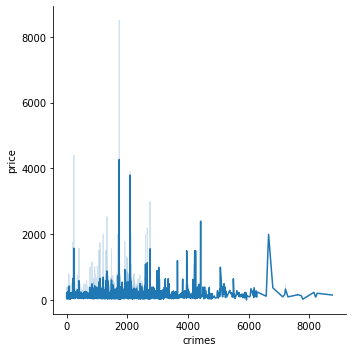

In [48]:
sns.relplot(x = 'crimes', y = 'price', data = df2, kind = 'line')

There is not very clear correlation between crimes and price. From 9/20/2017 to 3/30/2019, about 1.5 years, hundreds of thounsands of crimes were committed. I will also take a closer look at murders that occurred during the same period of time.

In [56]:
df_cm4 = df_cm3.copy()
df_cm4 = df_cm4[(df_cm4['OFNS_DESC'] == 'MURDER & NON-NEGL. MANSLAUGHTER') | (df_cm4['OFNS_DESC'] == 'MURDER & NON-NEGL. MANSLAUGHTE')].reset_index().drop('index', axis = 1)
len(df_cm4)

1160

In [105]:
import time
start_time = time.time() # to time this method
close = []
for ii in range(len(df2)):
    score = 0
    lat1 = df2['latitude'][ii] #in degree
    lon1 = df2['longitude'][ii] #in degree
    dg_walk_lat = 360 * five_min_walk / (2 * np.pi * 6371 * math.radians(lat1)) # distance converted to degree
    dg_walk_lon = 360 * five_min_walk / (2 * np.pi * 6371)
    # find how many crimes are within 5 minutes away
    close_crimes = len(df_cm4[[(df_cm4['Latitude'].iloc[jj] <= (lat1 + dg_walk_lat)) \
                               & (df_cm4['Latitude'].iloc[jj] >= (lat1 - dg_walk_lat)) \
                               & (df_cm4['Longitude'].iloc[jj] <= (lon1 + dg_walk_lat)) \
                               & (df_cm4['Longitude'].iloc[jj] >= (lon1 - dg_walk_lat)) \
                               for jj in range(len(df_cm4))]])
    close.append(close_crimes)
df2['murder'] = close      # 0~51 stations, on average 27
print("--- %s seconds ---" % (time.time() - start_time))

--- 699.4179692268372 seconds ---


In [107]:
df2.to_csv('aibnb_murder_subway_jupyter.csv')

In [6]:
# Jupyter notebook restarted
df2 = pd.read_csv('aibnb_murder_subway_jupyter.csv')

In [7]:
df2.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'subway station H', 'subway station xy',
       'subway station', 'Days since last review', 'crimes', 'murder'],
      dtype='object')

In [8]:
df2['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island'],
      dtype=object)

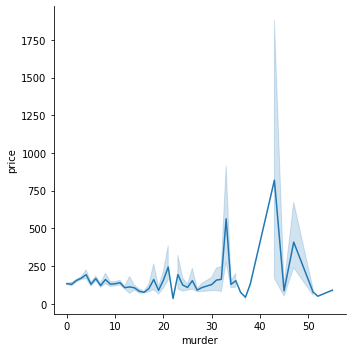

In [109]:
sns.relplot(x = 'murder', y = 'price', data = df2, kind = 'line')

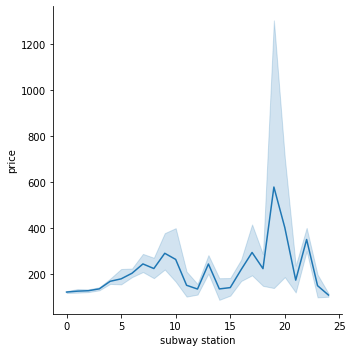

In [110]:
sns.relplot(x = 'subway station', y = 'price', data = df2, kind = 'line')

In [111]:
df2['subway station'].describe()

count    12467.000000
mean         2.358065
std          2.272782
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: subway station, dtype: float64

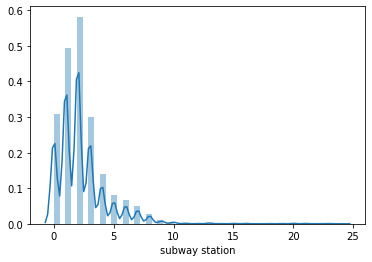

In [112]:
sns.distplot(df2['subway station'])

In [113]:
df2['murder'].describe()

count    12467.000000
mean         3.368814
std          6.327613
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         55.000000
Name: murder, dtype: float64

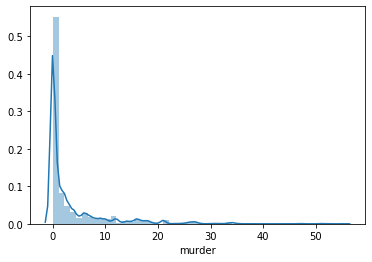

In [114]:
sns.distplot(df2['murder'])

In [9]:
# Remove outliers in the numerical columns
# This procedure is essential for the model (data not shown, tested without this step)
data_outliers = ['minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', \
                 'availability_365', 'price', 'crimes', 'murder', 'subway station']
df3a = df2.copy()
for ii in data_outliers:
    df3a_mean = []
    df3a_std = []
    cutoff = []
    lower = []
    upper = []
    df3a_mean, df3a_std = np.mean(df3a[ii]), np.std(df3a[ii])
    cutoff = df3a_std * 3
    lower, upper = df3a_mean - cutoff, df3a_mean + cutoff
    lower = max(lower, 0)
    df3a[ii] = df3a[ii].where((df3a[ii] > lower) & (df3a[ii] < upper)) # remove data above 3 stds away from the mean
df3a = df3a.dropna()
for ii in data_outliers:
    df3a[ii] = df3a[ii].tolist()
df3a = df3a.reset_index().drop(['index'], axis = 1)
df3a['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Bronx', 'Queens'], dtype=object)

This process of outlier removal also removed the remaining points from Staten Island, one of the five neighbourhood groups in New York.

In [10]:
# Drop the columns that will not be used
df3b = df3a.copy()
df3b = df3b.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis = 1)

In [11]:
# Convert the categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
df3c = pd.DataFrame([df3b['neighbourhood_group'], df3b['room_type']]).T 
df3c['neighbourhood_group'] = le.fit_transform(df3c['neighbourhood_group']) #convert neighhourhood groups to distinct numbers
df3c['room_type'] = le.fit_transform(df3c['room_type']) #convert room types to distinct numbers
ohe = OneHotEncoder()
df3c = ohe.fit_transform(df3c).toarray() # use one hot encoder to convert distinct numbers to columns of 0s and 1s

df3c.shape
df3d = pd.DataFrame(df3c, columns = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Entire Home/Apt', 'Private Room', 'Shared Room'])
df4 = pd.merge(df3b, df3d, how = 'outer', left_index = True, right_index = True)
df4 = df4.drop(['neighbourhood', 'neighbourhood_group', 'room_type'], axis = 1)
df4.columns

C:\Users\lw1365\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Index(['Unnamed: 0', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'subway station H', 'subway station xy', 'subway station',
       'Days since last review', 'crimes', 'murder', 'Bronx', 'Brooklyn',
       'Manhattan', 'Queens', 'Entire Home/Apt', 'Private Room',
       'Shared Room'],
      dtype='object')

In [12]:
# Prepare for training sets and testing sets
X = df4.drop('price', axis = 1)
y = df4['price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
##Scale the features, post-scaling inactivated
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [29]:
# Pre-scaling is used, considering the methods below are better for the original data
X_train_scaled = X_train
X_test_scaled = X_test

In [30]:
# Algirthm 1 -- K-Nearest Neighbor
# Sensitive to scaling
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 100).fit(X_train_scaled, y_train)
print(knnreg.score(X_train_scaled, y_train)) 
print(knnreg.score(X_test_scaled, y_test))
# prescaling: 
# 0.01763338045136864
# 0.005270167698633532
# post-scaling:
# 0.28165167542557834
# 0.20841288361724808

0.01763338045136864
0.005270167698633532


In [32]:
# Algotithm 2-- Linear Regression
# Not sensitive to scaling
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
print(linreg.score(X_train_scaled, y_train)) 
print(linreg.score(X_test_scaled, y_test)) 
# prescaling:
# 0.3487463554695992
# 0.2891685200941767
# post-scaling:
# 0.34874635546959976
# 0.289168520094243

0.3487463554695992
0.2891685200941767


In [33]:
# Algorithm 3 -- Ridge Regression
# Not sensitive to scaling, slighly better post-scaling
from sklearn.linear_model import Ridge
linridge = Ridge(alpha = 1).fit(X_train_scaled, y_train) #doesnt change much changing alpha
print(linridge.score(X_train_scaled, y_train)) 
print(linridge.score(X_test_scaled, y_test)) 
# prescaling:
# 0.3393911912747165
# 0.27862834248494617
# post-scaling:
# 0.3484823170430936
# 0.2893389230705873

0.3393911912747165
0.27862834248494617


In [34]:
# Algorithm 4 -- Lasso Regression
# Not sensitive to scaling, slightly better result pre-scaling
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha = 2, max_iter = 10000).fit(X_train_scaled, y_train) 
print(linlasso.score(X_train_scaled, y_train)) 
print(linlasso.score(X_test_scaled, y_test)) 
# prescaling:
# 0.31273082393035145
# 0.2601776680585989
# post-scaling:
# 0.29360842601104253
# 0.24802461437197132

0.31273082393035145
0.2601776680585989


In [35]:
# Algorithm 5 -- Random Forest
# Not sensitive to scaling, slightly better result pre-scaling
from sklearn.ensemble import RandomForestRegressor
rndforest = RandomForestRegressor(max_features = 3, random_state = 0).fit(X_train_scaled, y_train)
print(rndforest.score(X_train_scaled, y_train)) 
print(rndforest.score(X_test_scaled, y_test)) 
# prescaling:
# 0.8670542187598393
# 0.3063821306889457
# post-scaling:
# 0.8662067786151053
# 0.3017395110391603

0.8670542187598393
0.3063821306889457


C:\Users\lw1365\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
# Algorithm 6 -- Gradient Boosting Regressor
# Not sensitive to scaling, slightly better result pre-scaling
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate = 0.04, max_depth = 4, random_state = 0).fit(X_train_scaled, y_train)
print(gbr.score(X_train_scaled, y_train)) 
print(gbr.score(X_test_scaled, y_test)) 
# prescaling:
# 0.6287538847953389
# 0.3558458866611073
# post-scaling:
# 0.6287538847953389
# 0.3558458866611073

0.6287538847953389
0.3558458866611073


Among the above six methods, Gradient Boosting Regressor shows the best R2, compared to Radom Forest and other regression models. A few things to note:
1) All six methods show less than acceptable prediction power, of which R2 is lower than that of the models in New_York_Airbnb2, where subway and crime information is not included. 
2) Some learning algorithms such as KNN is sensitive to scaling for features, while regression and ensemble algorithms used here are more robust to the range of data.
3) Parameters with different values are tested to find the best version of most of the algorithms tested here, and I try to avoid overfitting. 
4) I need to dig a little deeper in learning algorithms to see what can be done to improve the predicition accuracy.

In [37]:
# K-fold cross validation of the best algorithm
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gbr, X, y, cv = 100)
print(np.mean(cv_scores)) 

0.3225086571253122
